<script></script>
# The DCT (Discrete Cosine Transform)

Jim Mahoney | Computer Science @ Marlboro College |
cs.marlboro.edu | Feb 2014 | MIT License

An explanation and illustration of the math behind the Discrete Cosine Transform
and the concepts used in lossy JPEG image compression - low pass filtering.

## The basic linear algebra with N = 2

You can think of a vector - a list of numbers - as coefficients times basis vectors.

$$  f_0 \left[ \begin{array}{c}  1 \\ 0  \end{array} \right] + f_1 \left[ \begin{array}{c}  0 \\ 1  \end{array} \right] $$

Using a different basis, different coefficients can describe the same vector.

$$  G_0 \frac{1}{\sqrt{2}} \left[ \begin{array}{c}  1 \\ 1  \end{array} \right] + 
G_1 \frac{1}{\sqrt{2}} \left[ \begin{array}{c}  1 \\ -1  \end{array} \right] $$

(The sqrt(2)'s give the basis vectors length 1, i.e. "normalizes" them.)

This transormation <b>f</b> to <b>G</b> is a DCT (Discrete Cosine Transform). 
For a vector with 2 components, this perhaps isn't all that exciting, 
but does still transform the original $(f_0, f_1)$ into low and high frequency components $(G_0, G_1)$.


### quick quiz 1

If $f_0 = 3$ and $f_1 = 5$, what are the G's?

### the matrix math

This transform can be written as a matrix multiplication.

$$ 
f_0 \left[ \begin{array}{c}  1 \\ 0  \end{array} \right] + f_1 \left[ \begin{array}{c}  0 \\ 1  \end{array} \right] = 
\left[ \begin{array}{c}  f_0 \\ f_1  \end{array} \right] = 
G_0 \frac{1}{\sqrt{2}} \left[ \begin{array}{c}  1 \\ 1  \end{array} \right] + 
G_1 \frac{1}{\sqrt{2}} \left[ \begin{array}{c}  1 \\ -1  \end{array} \right] =
\frac{1}{\sqrt{2}} \left[ \begin{array}{cc}  1 & 1 \\ 1 & -1  \end{array} \right] 
\left[ \begin{array}{c} G_0 \\ G_1  \end{array} \right]
$$

Moreover, this orthnormal matrix has the interesting and useful property that
its transpose is its inverse. That makes the equation easy to invert.

### quick quiz 2

Show that the matrix times its transpose is the identity, and use that to find the G's.

### two dimensions

The same idea can be applied to 2D images rather than 1D vectors,
by applying the 1D transform to each row and column of the image.

The 2D basis images for N=2 are then the outer products of the 1D basis vectors.
From lowest (0,0) to highest (1,1) spatial frequency these basis images are :

In [130]:
import numpy as np
import matplotlib as mpl
%pylab inline
np.set_printoptions(suppress=True, precision=3)

Populating the interactive namespace from numpy and matplotlib


$ u^T v = u \cdot v$

$ u v^T $

In [131]:
basis = (1/sqrt(2) * np.array([1, 1]), 1/sqrt(2) * np.array([1, -1]))
for i in [0,1]:
    for j in [0,1]:
        print("{}, {} :".format(i,j))
        print(np.outer(basis[i], basis[j]))
        print()

0, 0 :
[[ 0.5  0.5]
 [ 0.5  0.5]]

0, 1 :
[[ 0.5 -0.5]
 [ 0.5 -0.5]]

1, 0 :
[[ 0.5  0.5]
 [-0.5 -0.5]]

1, 1 :
[[ 0.5 -0.5]
 [-0.5  0.5]]



### quick quiz

For an image $ f = \left[ \begin{array}{cc} 5 & 8 \\ 4 & -1 \end{array} \right]$, what are the correspoding four $G$ coefficients?

## N = 8

JPEG image compression uses the same sort of transform but with 8 coefficients, not 2.

The matrix is defined by this formula :

$$ 
G_u = \sqrt{\frac{2}{N}} \frac{1}{\sqrt{2}} f_0 + 
\sqrt{\frac{2}{N}} \sum_{x=1}^7 f_x \, cos\left( \frac{\pi}{8} (u + \frac{1}{2}) x \right)
$$

See http://en.wikipedia.org/wiki/Discrete_cosine_transform
and http://www.whydomath.org/node/wavlets/dct.html for the details.
In the wikipedia entry, we're using the JPEG transform which corresponds
to the "Some authors further multiply the X0 term by 1/sqrt(2) and multiply the resulting matrix 
by an overall scale factor of sqrt(2/N)" variation, 
where their $(k, n)$ indices are my $(u, x)$, 
and their $(X_k, x_n)$ is my $(G_u, f_x)$.


In [132]:
# The 8 x 8 DCT matrix thus looks like this.
N = 8
dct = np.zeros((N, N))
for x in range(N):
    dct[0,x] = sqrt(2.0/N) / sqrt(2.0)
for u in range(1,N):
    for x in range(N):
        dct[u,x] = sqrt(2.0/N) * cos((pi/N) * u * (x + 0.5) )        
dct

array([[ 0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354],
       [ 0.49 ,  0.416,  0.278,  0.098, -0.098, -0.278, -0.416, -0.49 ],
       [ 0.462,  0.191, -0.191, -0.462, -0.462, -0.191,  0.191,  0.462],
       [ 0.416, -0.098, -0.49 , -0.278,  0.278,  0.49 ,  0.098, -0.416],
       [ 0.354, -0.354, -0.354,  0.354,  0.354, -0.354, -0.354,  0.354],
       [ 0.278, -0.49 ,  0.098,  0.416, -0.416, -0.098,  0.49 , -0.278],
       [ 0.191, -0.462,  0.462, -0.191, -0.191,  0.462, -0.462,  0.191],
       [ 0.098, -0.278,  0.416, -0.49 ,  0.49 , -0.416,  0.278, -0.098]])

The corresponding eight 1D basis vectors (the matrix rows) oscillate with successively higher spatial frequencies.

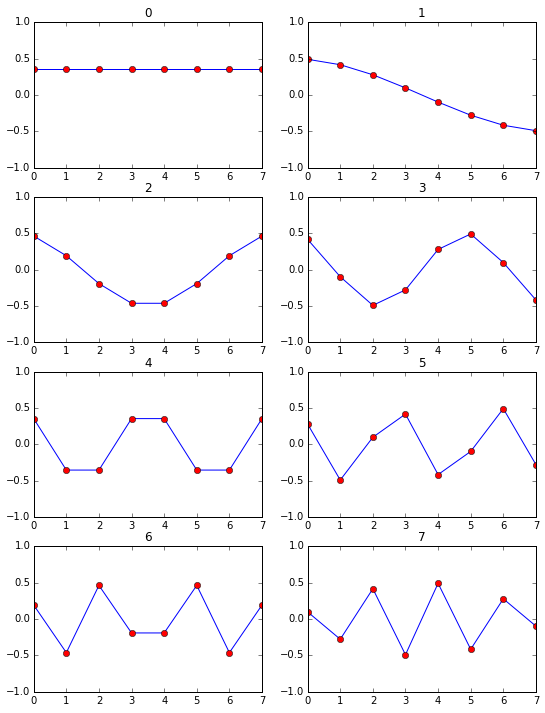

In [133]:
# Here's what they look like.
figure(figsize=(9,12))
for u in range(N):
    subplot(4, 2, u+1)
    ylim((-1, 1))
    title(str(u))
    plot(dct[u, :])
    plot(dct[u, :],'ro')

Like the N=2 case, the vectors are orthnormal. 
In other words, their dot products are 0, and each has length 1. 
Here are a few illustrative products.

In [134]:
def rowdot(i,j):
    return dot(dct[i, :], dct[j, :])
print(array([[rowdot(i,j) for i in range(8)] for j in range(8)]))

[[ 1.  0. -0.  0.  0.  0. -0. -0.]
 [ 0.  1.  0. -0.  0. -0.  0.  0.]
 [-0.  0.  1.  0. -0.  0.  0.  0.]
 [ 0. -0.  0.  1.  0.  0. -0.  0.]
 [ 0.  0. -0.  0.  1.  0. -0. -0.]
 [ 0. -0.  0.  0.  0.  1.  0. -0.]
 [-0.  0.  0. -0. -0.  0.  1.  0.]
 [-0.  0.  0.  0. -0. -0.  0.  1.]]


In [135]:
def coldot(i,j):
    return dot(dct[:, i], dct[:, j])
print(array([[coldot(i,j) for i in range(8)] for j in range(8)]))

[[ 1.  0. -0. -0. -0.  0.  0. -0.]
 [ 0.  1. -0.  0.  0. -0. -0.  0.]
 [-0. -0.  1. -0. -0. -0. -0. -0.]
 [-0.  0. -0.  1.  0.  0.  0.  0.]
 [-0.  0. -0.  0.  1. -0. -0. -0.]
 [ 0. -0. -0.  0. -0.  1.  0.  0.]
 [ 0. -0. -0.  0. -0.  0.  1.  0.]
 [-0.  0. -0.  0. -0.  0.  0.  1.]]


This also implies the inverse of this matrix is just its transpose.

In [136]:
dct_transpose = dct.transpose()
dct_transpose

array([[ 0.354,  0.49 ,  0.462,  0.416,  0.354,  0.278,  0.191,  0.098],
       [ 0.354,  0.416,  0.191, -0.098, -0.354, -0.49 , -0.462, -0.278],
       [ 0.354,  0.278, -0.191, -0.49 , -0.354,  0.098,  0.462,  0.416],
       [ 0.354,  0.098, -0.462, -0.278,  0.354,  0.416, -0.191, -0.49 ],
       [ 0.354, -0.098, -0.462,  0.278,  0.354, -0.416, -0.191,  0.49 ],
       [ 0.354, -0.278, -0.191,  0.49 , -0.354, -0.098,  0.462, -0.416],
       [ 0.354, -0.416,  0.191,  0.098, -0.354,  0.49 , -0.462,  0.278],
       [ 0.354, -0.49 ,  0.462, -0.416,  0.354, -0.278,  0.191, -0.098]])

In [137]:
dot(dct, dct_transpose)

array([[ 1.,  0., -0.,  0.,  0.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  1.,  0.,  0., -0.,  0.],
       [ 0.,  0., -0.,  0.,  1.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  0.,  1.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  0., -0., -0.,  0.,  1.]])

In [138]:
dot(dct_transpose, dct)

array([[ 1.,  0., -0., -0., -0.,  0.,  0., -0.],
       [ 0.,  1., -0.,  0.,  0., -0., -0.,  0.],
       [-0., -0.,  1., -0., -0., -0., -0., -0.],
       [-0.,  0., -0.,  1.,  0.,  0.,  0.,  0.],
       [-0.,  0., -0.,  0.,  1., -0., -0., -0.],
       [ 0., -0., -0.,  0., -0.,  1.,  0.,  0.],
       [ 0., -0., -0.,  0., -0.,  0.,  1.,  0.],
       [-0.,  0., -0.,  0., -0.,  0.,  0.,  1.]])

## playing with a real image

To make all this more concrete, let's apply the 2D DCT transform to part of a real image.

Here's one, takenly randomly from the web.

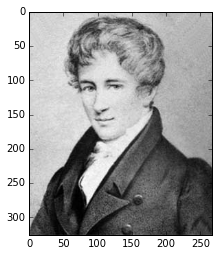

In [144]:
# See http://matplotlib.org/users/image_tutorial.html for the image manipulation syntax.
# The image itself is a small piece from http://www.cordwainer-smith.com/virgil_finlay.htm.
import matplotlib.image as mpimg
img = mpimg.imread('abel.jpg')
p=plt.imshow(img, cmap=mpl.cm.gray)

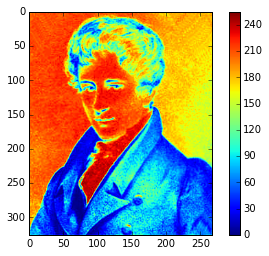

In [145]:
def show_image(img):
    plt.imshow(img)
    plt.colorbar()
show_image(img)

In [147]:
img.shape

(326, 268)

All three of the R,G,B color values in the greyscale image are the same for each pixel.

Let's just look at values from one tiny 8 x 8 block (which is what's used JPEG compression) near his nose.

(The next images use a false color spectrum to display pixel intensity.)

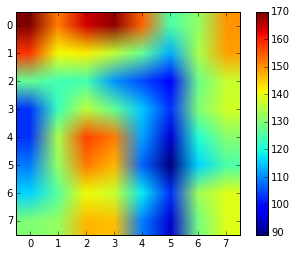

In [150]:
tiny = img[40:48, 60:68]    # a tiny 8 x 8 block
show_image(tiny)

In [151]:
# And here are the numbers.
tiny

array([[170, 152, 164, 169, 154, 125, 132, 150],
       [158, 141, 142, 136, 127, 113, 134, 149],
       [127, 124, 124, 111, 105,  99, 128, 137],
       [103, 123, 136, 127, 115, 103, 130, 138],
       [103, 134, 157, 152, 112,  95, 121, 131],
       [109, 132, 152, 147, 107,  89, 116, 125],
       [116, 126, 141, 137, 118, 103, 133, 139],
       [130, 132, 147, 146, 109,  95, 129, 139]], dtype=uint8)

Now we define the 2D version of the N=8 DCT described above. 

The trick is to apply the 1D DCT to every column, *and* then also apply it to every row, i.e.

$$ G = {DCT} \cdot f \cdot {DCT}^{T} $$
$$ f = {DCT}^T \cdot G \cdot {DCT} $$

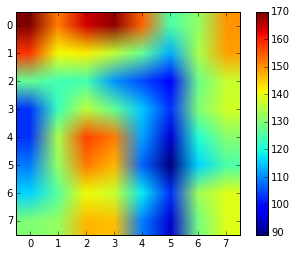

In [152]:
def doDCT(grid):
    return dot(dot(dct, grid), dct_transpose)

def undoDCT(grid):
    return dot(dot(dct_transpose, grid), dct)

# test : do DCT, then undo DCT; should get back the same image.
tiny_do_undo = undoDCT(doDCT(tiny))

show_image(tiny_do_undo) # Yup, looks the same.

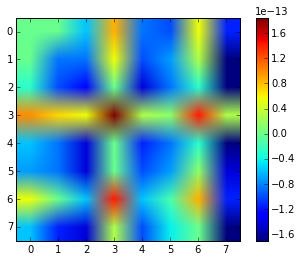

In [157]:
# And the numbers are the same.
tiny_do_undo - tiny
show_image(tiny_do_undo - tiny)

The DCT transform looks like this. 
Note that most of the intensity is at the top left, in the lowest frequencies.

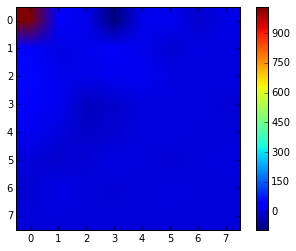

In [158]:
tinyDCT = doDCT(tiny)
show_image(tinyDCT)

In [159]:
set_printoptions(linewidth=100) # output line width (default is 75)
tinyDCT

array([[ 1033.5  ,    29.704,    15.393,   -91.541,    15.5  ,    21.779,   -13.141,    12.061],
       [   42.361,     7.571,    14.152,    30.262,    13.935,    -8.91 ,     7.218,     4.464],
       [   55.198,    18.234,    10.075,    18.457,    20.711,     5.404,     5.027,     1.265],
       [   31.54 ,    20.395,   -29.024,   -14.147,     5.024,     0.805,     1.134,    -3.847],
       [   22.25 ,     4.497,   -17.731,   -10.671,     2.75 ,     1.353,     0.309,    -2.728],
       [   -1.69 ,   -15.777,    -3.975,     8.896,    -0.702,    -4.862,    -0.348,     4.183],
       [  -11.769,    11.175,     0.277,    -3.968,     0.351,     2.408,     0.175,    -1.966],
       [   -0.059,    -0.445,     0.082,     0.122,    -0.669,     0.386,     0.022,    -0.063]])

<img src="http://cs.marlboro.edu/courses/spring2014/information/images/Dctjpeg.png"/ width=292 style="float:left; padding:2em">

The grid positions in that last image correspond to spatial frequencies, with the lowest DC component at the top left, and the highest vertical and horizontal frequency at the bottom right.

These 2D basis functions can be visualized with this image from <a href="http://en.wikipedia.org/wiki/File:Dctjpeg.png">wikimedia commons</a>.

The details of what I'm doing here don't really match the JPEG transformations:
I haven't done the color space transforms, and I haven't handled the DC offsets
as the JPEG spec does (which centers the values around 0 explicitly.)

But the concept is visible in the last two pictures: after the DCT, most of the power is in fewer pixels, which are typically near the top left DC part of the grid. 

So here's a simple lossy "low pass filter" of the data : let's 
chop some of the high frequency numbers.
One (somewhat arbitrary) choice to to set the frequencies 
higher than the (1,7) to (7,1) line, to zero.

This is a lossy transormation since we're throwing away information - 
it can't be undone. But since there are fewer numbers, it's a form 
of compression.

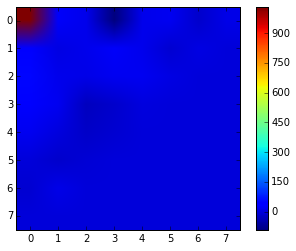

In [177]:
def chopped(original, level=5):
    chopped = original.copy()
    for x in range(N):
        for y in range(N):
            if x+y > level:
                chopped[x,y] = 0.
    return chopped
tinyDCT_chopped = chopped(tinyDCT, level=7)
show_image(tinyDCT_chopped)

In [178]:
tinyDCT_chopped


array([[ 1033.5  ,    29.704,    15.393,   -91.541,    15.5  ,    21.779,   -13.141,    12.061],
       [   42.361,     7.571,    14.152,    30.262,    13.935,    -8.91 ,     7.218,     0.   ],
       [   55.198,    18.234,    10.075,    18.457,    20.711,     5.404,     0.   ,     0.   ],
       [   31.54 ,    20.395,   -29.024,   -14.147,     5.024,     0.   ,     0.   ,     0.   ],
       [   22.25 ,     4.497,   -17.731,   -10.671,     0.   ,     0.   ,     0.   ,     0.   ],
       [   -1.69 ,   -15.777,    -3.975,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ],
       [  -11.769,    11.175,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ],
       [   -0.059,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ]])

To see what this did to the original, we just transform it back.

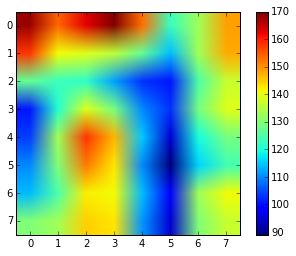

In [179]:
tiny_chopped_float = undoDCT(tinyDCT_chopped)

# Also convert the floats back to uint8, which was the original format
tiny_chopped = vectorize(lambda x: uint8(x))(tiny_chopped_float) 

show_image(tiny_chopped)

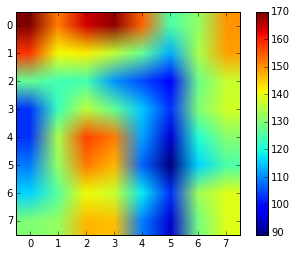

In [170]:
show_image(tiny)

In [180]:
img.shape

(326, 268)

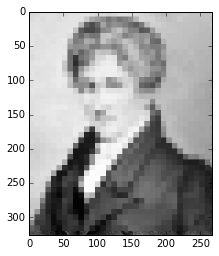

In [190]:
img2 = img.copy()
for i in range(0,img.shape[0]-8,8):
    for j in range(0,img.shape[1]-8,8):
        tinyDCT = doDCT(img2[i:i+8,j:j+8])
        tinyDCT_chopped = chopped(tinyDCT, 0)
        img2[i:i+8,j:j+8] = undoDCT(tinyDCT_chopped)
imshow(img2, cmap=mpl.cm.gray)

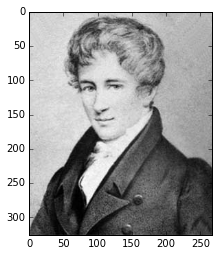

In [186]:
imshow(img, cmap=mpl.cm.gray)

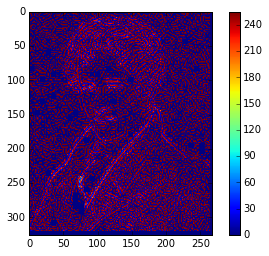

In [187]:
show_image(img-img2)

In [191]:
def dct_all(img, level): 
    img2 = img.copy()
    for i in range(0,img.shape[0]-8,8):
        for j in range(0,img.shape[1]-8,8):
            tinyDCT = doDCT(img2[i:i+8,j:j+8])
            tinyDCT_chopped = chopped(tinyDCT, level)
            img2[i:i+8,j:j+8] = undoDCT(tinyDCT_chopped)
    return img2

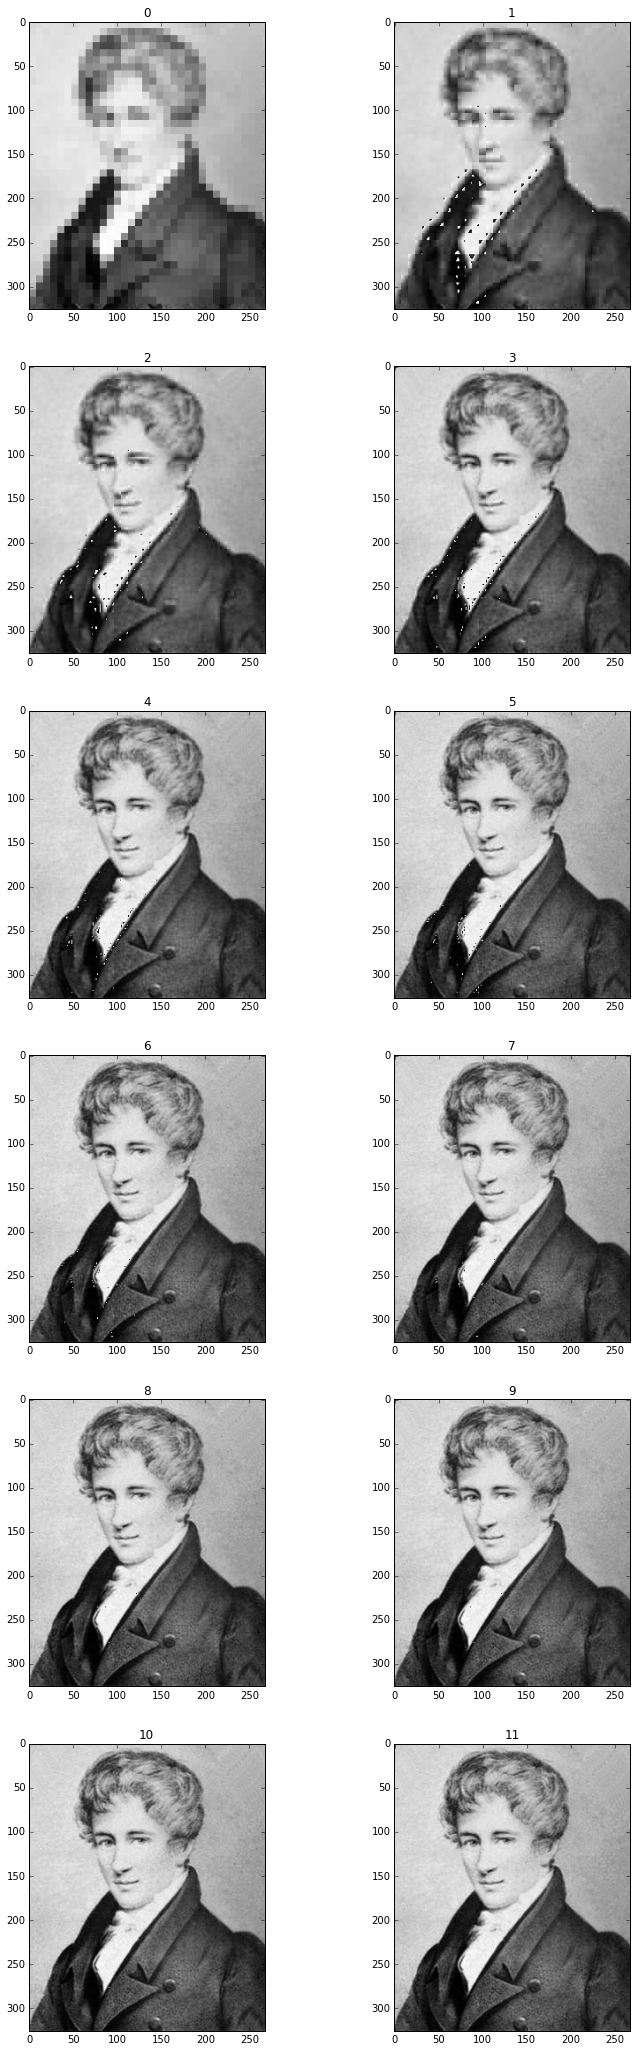

In [192]:
figure(figsize=(12,36))
for u in range(12):
    subplot(6, 2, u+1)
    title(str(u))
    imshow(dct_all(img, u), cmap=mpl.cm.gray)

And we have something close to the original back again - even though close to half of the transformed image was set to zero.

## conclusions

The procedue here isn't what happens in JPEG compression, but does illustrate one of the central 
concepts - throwing away some of higher spatial frequency information after a DCT transform.

In the real JPEG lossy compression algorithm, the steps are

* the color space is transformed from R,G,B to Y,Cb,Cr to take advantage of human visual prejudices

* the values are shifted so that they center around zero

* the values after the DCT are "quantized" (i.e. rounded off) by different amounts at different spots in the grid. *(*This* is the lossy step, and how lossy depends on the JPEG quality.)

* a zigzag (keeping similar frequencies together) pattern turns this to a 1D stream of 64 values

* which are then huffman encoded by, typically by a pre-chosen code (part of the JPEG standard)

For all the JPEG details, see http://en.wikipedia.org/wiki/JPEG .
